# MATH 4340 / COSC 4340: Numerical Methods for Differential Equations
# Notebook 1: Taylor Approximation Example

### Professor: Dane Taylor
### Date: Spring 2024

* topics: order of accuracy, error bounds, convergence rate, machine precision, runtime, plotting


In [1]:
# By default, a Jupyter notebook has no available code.
# We must import, or load, the relevant Python modules that we will use.

from numpy import * 
from matplotlib.pyplot import *

# The module numpy is very similar to Matlab, since it defines arrays such as vectors and matrices.
# The module matplotlib is good for making plots.

# import * means important everything. You. could also import a single function
#from numpy import array

In [2]:
# I typically just run the following line of code
%pylab inline
#which includes the 2 import statements above and a couple others that are commonly used

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/danetaylor/anaconda3/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['draw_if_interactive']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
# A more careful approach gives the Python modules names to avoid confusion.
import numpy as np
import matplotlib.pyplot as plt
# Consider if both modules have the same function "agh()". How does Python know which to use?
# Importing this way, one can use either np.agh() or plt.agh().
# I won't worry about this and will instead use  "%pylab inline" since its 1 line of code.

##  Taylor expansions without truncation

Consider the approximation of $y(t) = e^{-2t}$ near $t=0$:
\begin{align*}
y(t) =& y(0) + ty'(0) + \frac{t^2}{2}y''(0) + \frac{t^3}{3!}y'''(0) + ...\\
=& 1+t(-2)+\frac{t^2}{2}(-2)^2 +\frac{t^3}{3!}(-2)^3 + ...\\
=& 1-2t+2t^2  - (8/6) t^3  + ...
\end{align*}

In [4]:
def true_y(t): 
    return exp(-2*t)

#true_y = lambda t: exp(-2*t)

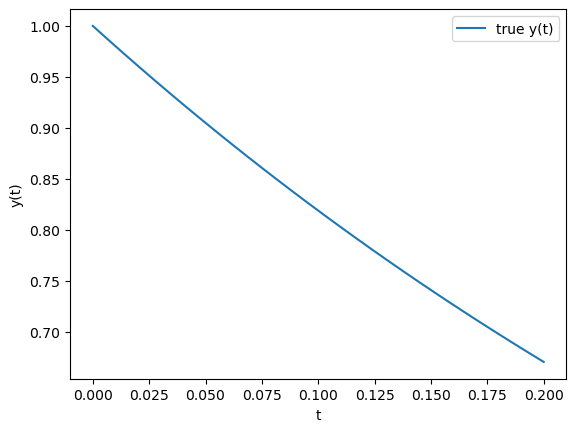

In [5]:
t = linspace(0,.2,30) # T=.2, N=30
plot(t,true_y(t))
xlabel('t')
ylabel('y(t)')
legend(['true y(t)'])

In [6]:
def taylor_1(t): 
    return 1-2*t

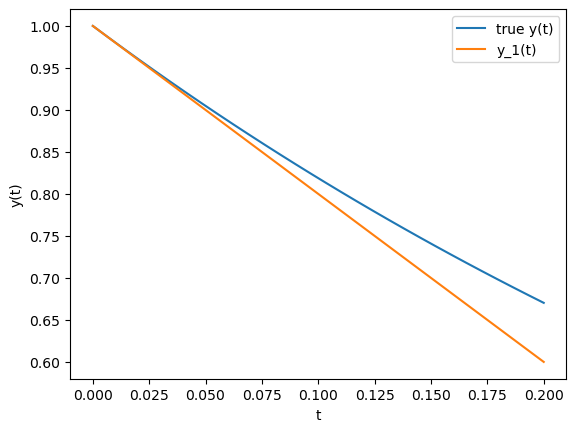

In [7]:
t = linspace(0,.2,30)
plot(t,true_y(t))
plot(t,taylor_1(t))
xlabel('t')
ylabel('y(t)')
legend(['true y(t)','y_1(t)'])

## 2nd order approximation is more accurate

In [8]:
def taylor_2(t): 
    return 1-2*t + t**2/2*(4)

#taylor_2 = lambda t: 1-2*t + t**2/2*(4)

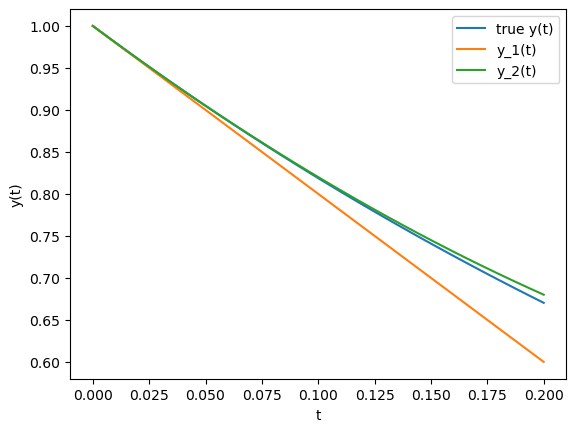

In [9]:
t = linspace(0,.2,30)
plot(t,true_y(t))
plot(t,taylor_1(t))
plot(t,taylor_2(t))
xlabel('t')
ylabel('y(t)')
legend(['true y(t)','y_1(t)','y_2(t)'])

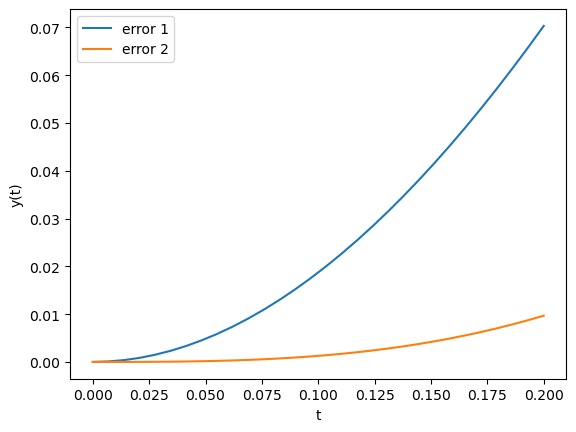

In [10]:
error1 = lambda t: abs(true_y(t)  - taylor_1(t))
error2 = lambda t: abs(true_y(t)  - taylor_2(t))

plot(t,error1(t))
plot(t,error2(t))
xlabel('t')
ylabel('y(t)')
legend(['error 1','error 2'])

# Understanding the behavior of error

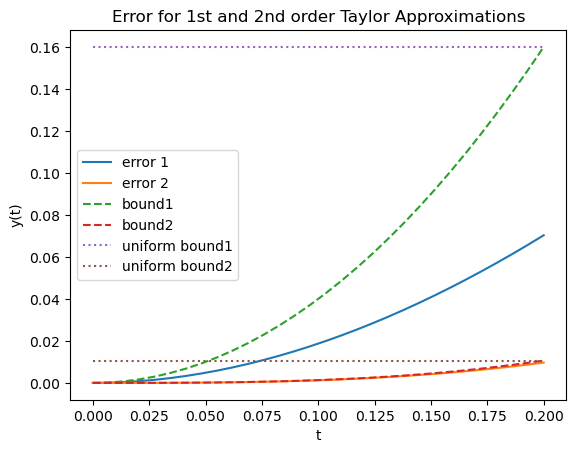

In [11]:
t = linspace(0,.2,30)

bound1 = lambda t: abs(2*t**2/2*(4))
bound2 = lambda t: abs(t**3/6*(8))

plot(t,error1(t))
plot(t,error2(t))

plot(t,bound1(t),'--')
plot(t,bound2(t),'--')


plot(t,max(bound1(t))*ones(len(t)),':')
plot(t,max(bound2(t))*ones(len(t)),':')
              
xlabel('t')
ylabel('y(t)')
legend(['error 1','error 2','bound1','bound2','uniform bound1','uniform bound2'])
title('Error for 1st and 2nd order Taylor Approximations')
savefig('Taylor_approx_error_fig.pdf')

## Bound reveals the scaling behavior of error

In [12]:
t = 0.2*logspace(-4,0,10)
t

array([2.00000000e-05, 5.56511880e-05, 1.54852737e-04, 4.30886938e-04,
       1.19896850e-03, 3.33620107e-03, 9.28317767e-03, 2.58309933e-02,
       7.18762733e-02, 2.00000000e-01])

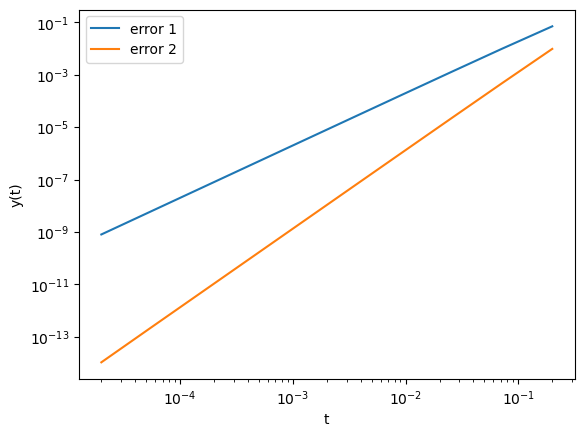

In [13]:
loglog(t,error1(t))
loglog(t,error2(t))
xlabel('t')
ylabel('y(t)')
legend(['error 1','error 2'])

In [14]:
polyfit(log(t), log(error1(t)), 1)

array([1.9905476 , 0.61409368])

In [15]:
polyfit(log(t), log(error2(t)), 1)

array([2.99348821, 0.23082209])

## Machine precision limits the range of numbers we can study 

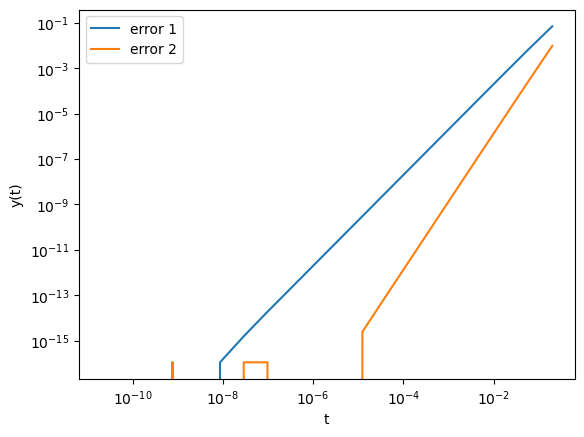

In [16]:
t = 0.2*logspace(-10,0,20)
loglog(t,error1(t))
loglog(t,error2(t))
xlabel('t')
ylabel('y(t)')
legend(['error 1','error 2'])

## Higher-order approximations require more computation and take longer

In [17]:
import timeit

In [18]:
%timeit for t_i in t: true_y(t_i)

5.87 µs ± 96.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [19]:
%timeit for t_i in t: taylor_1(t_i)

1.77 µs ± 43.1 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)


In [20]:
%timeit for t_i in t: taylor_2(t_i)

3.87 µs ± 43.7 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [21]:
def taylor_3(t): return 1-2*t + t**2/2*(4) - t**3/6*(8)

In [22]:
%timeit for t_i in t: taylor_3(t_i)

5.87 µs ± 64.4 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [23]:
error3 = lambda t: abs(true_y(t)  - taylor_3(t))
polyfit(log(t), log(error3(t)), 1)

/var/folders/v1/bgn3pn215cg_t0xdsp7clkbw0000gp/T/ipykernel_23092/3942776074.py:2: RuntimeWarning: divide by zero encountered in log
  polyfit(log(t), log(error3(t)), 1)


array([nan, nan])

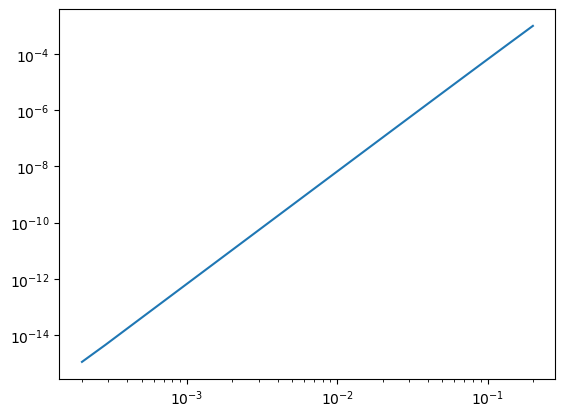

In [24]:
t = 0.2*logspace(-3,0,20)
loglog(t,error3(t))

In [25]:
polyfit(log(t), log(error3(t)), 1)

array([ 3.9908376 , -0.46292834])

## I recommend making figures with multiple panels

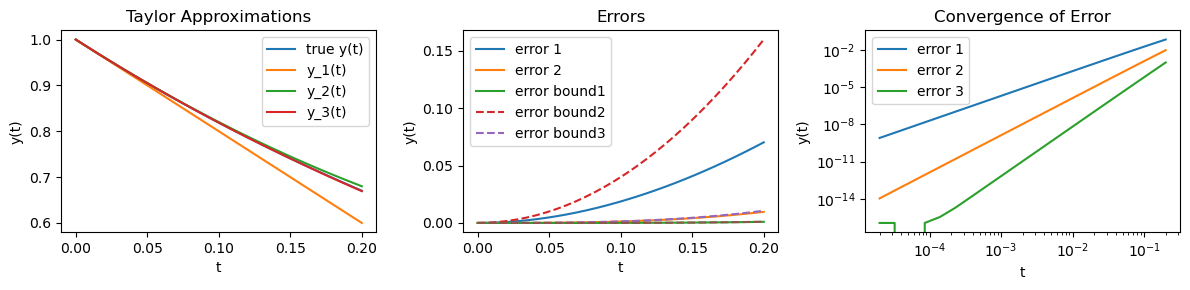

In [26]:
fig,ax = subplots(1,3,figsize = (12,3))

t = linspace(0,.2,30)


ax[0].plot(t,true_y(t))
ax[0].plot(t,taylor_1(t))
ax[0].plot(t,taylor_2(t))
ax[0].plot(t,taylor_3(t))
ax[0].set_xlabel('t')
ax[0].set_ylabel('y(t)')
ax[0].legend(['true y(t)','y_1(t)','y_2(t)','y_3(t)'])
ax[0].set_title('Taylor Approximations')


ax[1].plot(t,error1(t))
ax[1].plot(t,error2(t))
ax[1].plot(t,error3(t))
ax[1].plot(t,bound1(t),'--')
ax[1].plot(t,bound2(t),'--')
bound3 = lambda t: abs(t**4/(24)*(16))
ax[1].plot(t,bound3(t),'--')
              
ax[1].set_xlabel('t')
ax[1].set_ylabel('y(t)')
ax[1].legend(['error 1','error 2','error bound1','error bound2','error bound3'])
ax[1].set_title('Errors')


t = 0.2*logspace(-4,0,20)

ax[2].loglog(t,error1(t))
ax[2].loglog(t,error2(t))
ax[2].loglog(t,error3(t))
ax[2].set_xlabel('t')
ax[2].set_ylabel('y(t)')
ax[2].legend(['error 1','error 2','error 3'])
ax[2].set_title('Convergence of Error')


plt.tight_layout()
savefig('combined_fig.pdf')


In [27]:
t = 0.2*logspace(-3,0,20)
polyfit(log(t), log(error1(t)), 1)# returns linear fit: mx + b with slope m

array([1.98722241, 0.60701765])

In [28]:
polyfit(log(t), log(error2(t)), 1)# returns linear fit: mx + b with slope m

array([2.99039372, 0.22293519])

In [29]:
polyfit(log(t), log(error3(t)), 1)# returns linear fit: mx + b with slope m

array([ 3.9908376 , -0.46292834])

* 1st-order approx has 2nd-order error 
    * numerically we observed to be $\mathcal{O}(h^{1.98722241})$
* 2nd-order approx has 3rd-order error
    * numerically we observed to be $\mathcal{O}(h^{2.99039372})$
* 3rd-order approx has 4th-order error
    * numerically we observed to be $\mathcal{O}(h^{3.9908376})$